In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from matplotlib import style
from pandas_profiling import ProfileReport


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [8]:
passengers = pd.read_csv('data/tested.csv')

In [9]:
passengers.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
passengers.nunique()
#418 unique passengers

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [11]:
passengers[passengers['Survived']==1][0:5] #Those who have survived, only first 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S


In [12]:
(passengers['Survived']==1).sum() #total 152 survived

152

In [13]:
#those who have survived, belongs to which classes?
survived = passengers[passengers['Survived']==1]

In [14]:
survived['Pclass'].value_counts().keys()

Index([3, 1, 2], dtype='int64', name='Pclass')

In [15]:
survived['Pclass'].value_counts().values

array([72, 50, 30], dtype=int64)

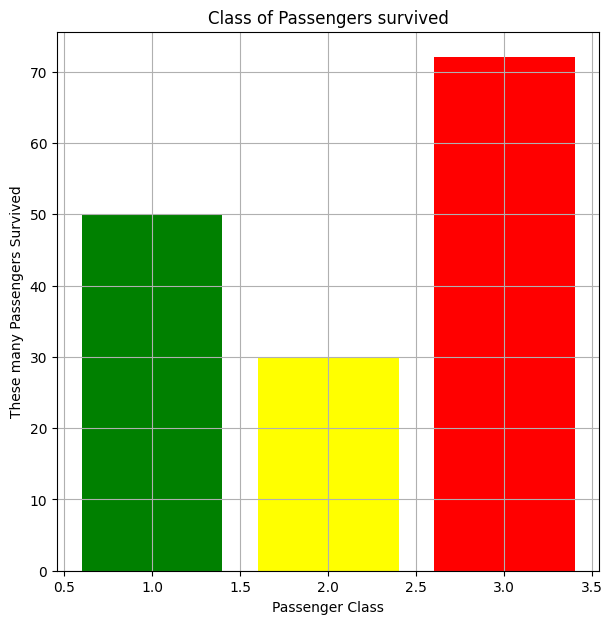

In [16]:
#Class of Passengers survived
plt.figure(figsize=(7,7))
plt.xlabel('Passenger Class')
plt.ylabel('These many Passengers Survived')
plt.yticks()
plt.grid()
plt.title('Class of Passengers survived')
plt.bar(survived['Pclass'].value_counts().keys(),survived['Pclass'].value_counts().values,color=['red','green','yellow'])
plt.show()

In [17]:
(passengers['Sex']=='female').sum() #Total 152 females in a ship

152

In [18]:
(survived['Sex']=='female').sum() and (passengers['Survived']==1).sum()

152

In [19]:
(survived['Sex']=='male').sum() and (passengers['Survived']==1).sum()
#No male survived!

0

In [20]:
passengers[['Name','Age']]

,Name,Age
0,"Kelly, Mr. James",34.5
1,"Wilkes, Mrs. James (Ellen Needs)",47.0
2,"Myles, Mr. Thomas Francis",62.0
3,"Wirz, Mr. Albert",27.0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0
...,...,...
413,"Spector, Mr. Woolf",NaN
414,"Oliva y Ocana, Dona. Fermina",39.0
415,"Saether, Mr. Simon Sivertsen",38.5
416,"Ware, Mr. Frederick",NaN


In [21]:
(passengers['Age'] <18).sum()

41

In [22]:
passengers[passengers['PassengerId'] == 940]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C


In [23]:
#Categorize based on age group
# 0-17 - Children
# 18-39 - Youth
# 40-59 - MiddleAged
# 60+ - SeniorCitizens
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
passengers['AgeGrp'] = pd.cut(passengers['Age'], bins=bins, labels=labels)

In [24]:
passengers['AgeGrp'].value_counts().keys()

CategoricalIndex(['Youth', 'MiddleAged', 'Children', 'SeniorCitizens'], categories=['Children', 'Youth', 'MiddleAged', 'SeniorCitizens'], ordered=True, dtype='category', name='AgeGrp')

In [25]:
passengers['AgeGrp'].value_counts().values

array([209,  68,  41,  14], dtype=int64)

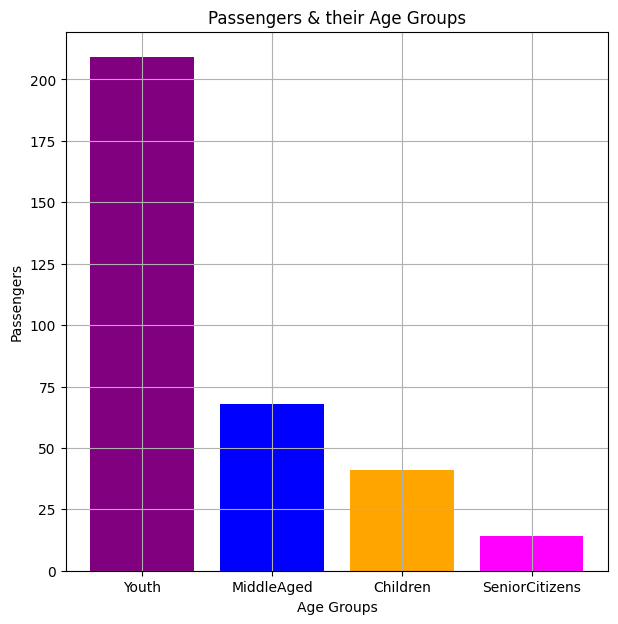

In [26]:
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Passengers')
plt.yticks()
plt.grid()
plt.title('Passengers & their Age Groups')
plt.bar(passengers['AgeGrp'].value_counts().keys(),passengers['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

In [27]:
#Categorize based on age group for survived
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)

C:\Users\richi\AppData\Local\Temp\ipykernel_17416\643931992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)


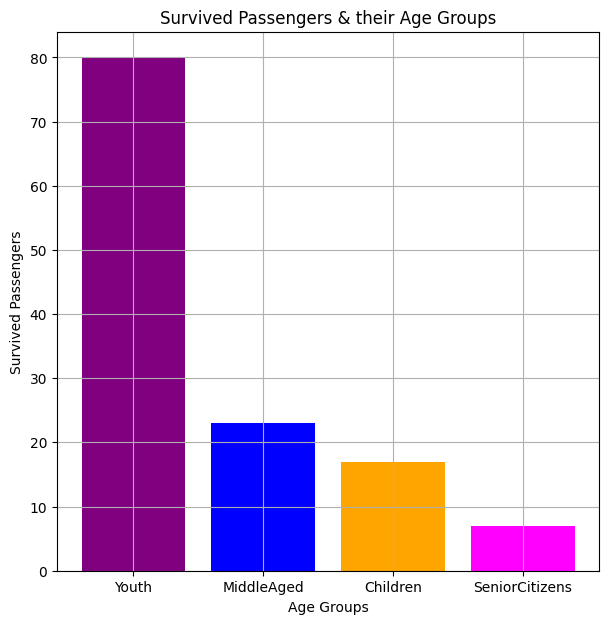

In [28]:
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.yticks()
plt.grid()
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

C:\Users\richi\AppData\Local\Temp\ipykernel_17416\4262422822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)


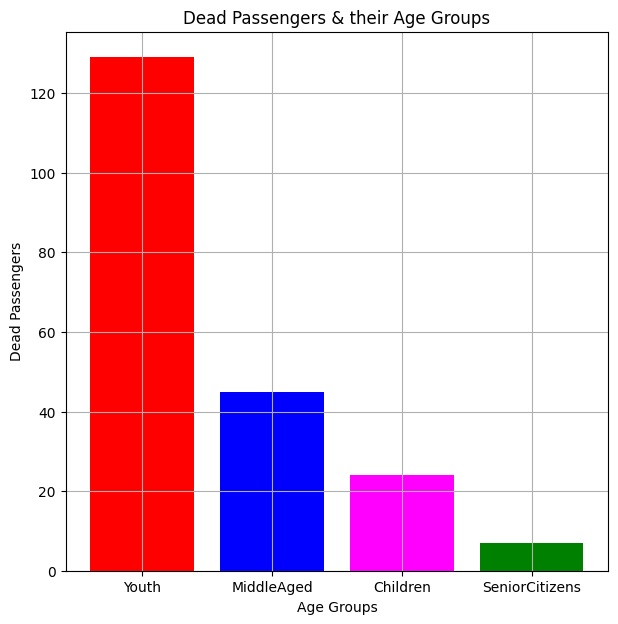

In [29]:
dead = passengers[passengers['Survived']==0]

#Categorize based on age group for dead
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)

plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.yticks()
plt.grid()
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

C:\Users\richi\AppData\Local\Temp\ipykernel_17416\1582301643.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


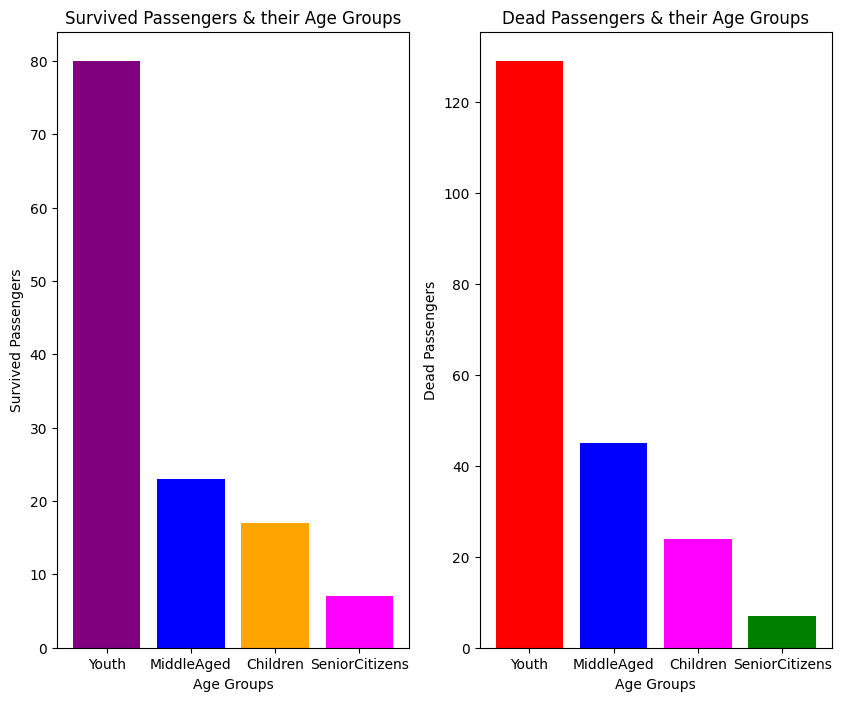

In [30]:
plt.figure(figsize=(10,8))

plt.grid()

plt.subplot(1, 2, 1)
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.subplot(1, 2, 2)
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

C:\Users\richi\AppData\Local\Temp\ipykernel_17416\697862483.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


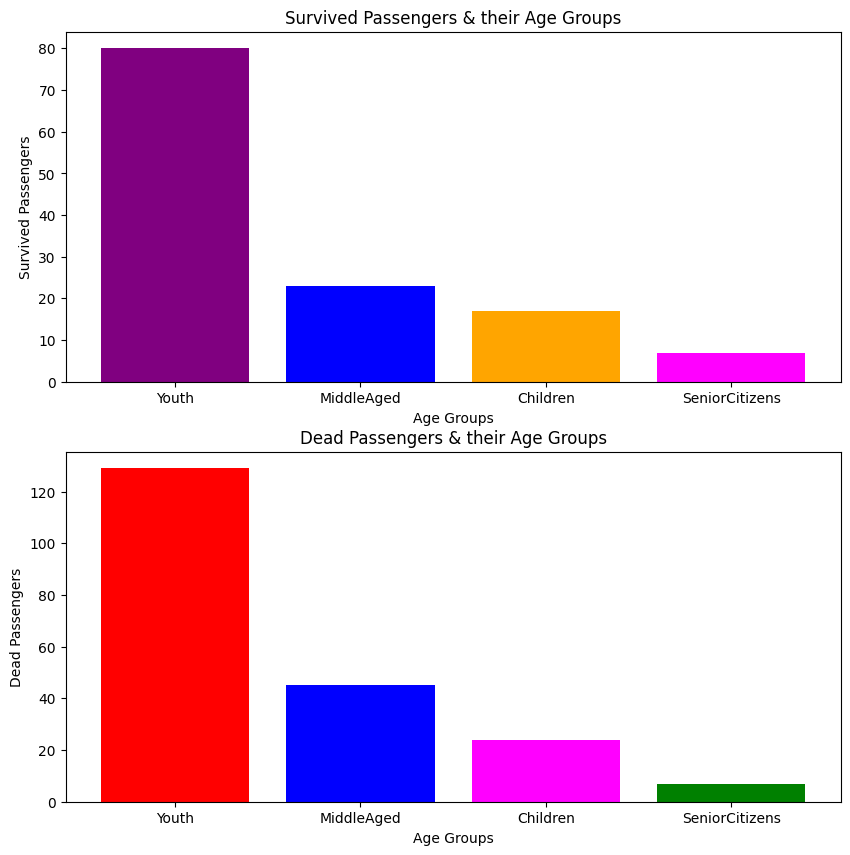

In [31]:
plt.figure(figsize=(10,10))

plt.grid()

plt.subplot(2, 1, 1)
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.subplot(2, 1, 2)
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

In [32]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


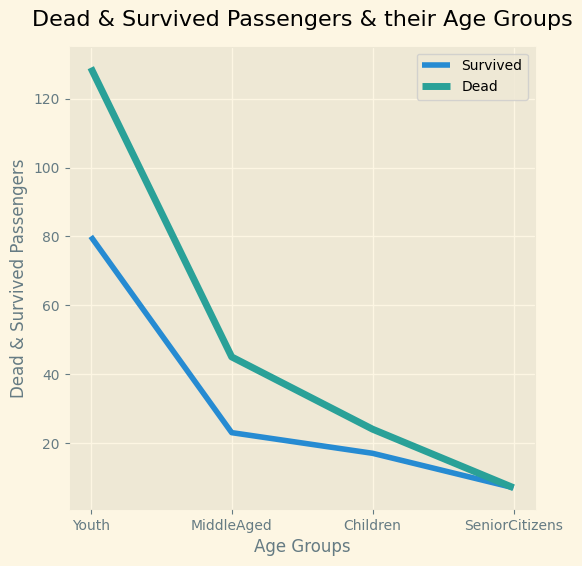

In [33]:
style.use("Solarize_Light2")
plt.figure(figsize=(6,6))
plt.plot(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(), label="Survived", linewidth=4)
plt.plot(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(), label="Dead", linewidth=5)

plt.xlabel('Age Groups')
plt.ylabel('Dead & Survived Passengers')
plt.title("Dead & Survived Passengers & their Age Groups",pad=15)
plt.legend()
#plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=8)
plt.show()

In [34]:
passengers.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGrp
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Youth
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,MiddleAged
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,SeniorCitizens
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Youth
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Youth


In [35]:
passengers[['Name','Cabin']]


,Name,Cabin
0,"Kelly, Mr. James",NaN
1,"Wilkes, Mrs. James (Ellen Needs)",NaN
2,"Myles, Mr. Thomas Francis",NaN
3,"Wirz, Mr. Albert",NaN
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",NaN
...,...,...
413,"Spector, Mr. Woolf",NaN
414,"Oliva y Ocana, Dona. Fermina",C105
415,"Saether, Mr. Simon Sivertsen",NaN
416,"Ware, Mr. Frederick",NaN


In [36]:
passengers['Cabin'].isnull().sum() # People with no Cabin

327

In [37]:
passengers['Cabin'].notnull().sum()

91

In [38]:
(passengers['Sex']=='male').sum()

266

In [39]:
((passengers['Cabin'].notnull()) & (passengers['Sex']=='male')).sum()
#So 47 males had cabin

47

In [40]:
((passengers['Cabin'].notnull()) & (passengers['Sex']=='female')).sum()
#So 44 females had cabin

44

In [41]:
passengers['Embarked'].value_counts()
# 270 Passengers mounted from Southampton
# 102 Passengers mounted from Cherbourg
# 46 Passengers mounted from Queenstown

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

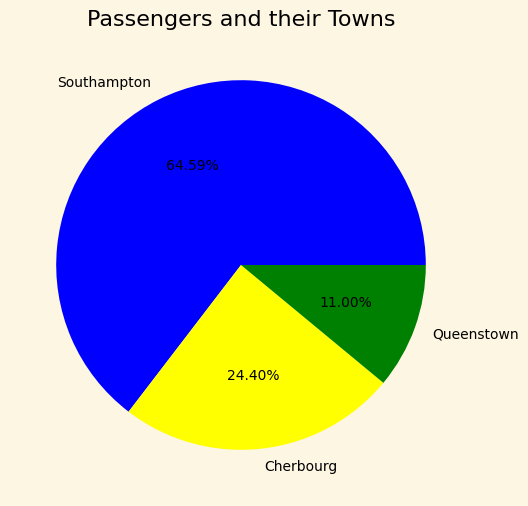

In [42]:
plt.figure(figsize=(6,6))
plt.title('Passengers and their Towns')
#shadow=True
plt.pie(passengers['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['blue','yellow','green'])
plt.show()

In [43]:
passengers[passengers['Embarked']=='S']
#Passengers from Southampton: 270

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGrp
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,MiddleAged
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Youth
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Youth
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Children
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,Children
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,Youth
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Youth


In [44]:
dead[dead['Embarked']=='S']
# Passengers died from Southampton : 182

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGrp
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Youth
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Children
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Youth
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Youth
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S,Children
406,1298,0,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S,Youth
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Youth


In [45]:
dead['Embarked'].value_counts()
# 182 dead from Southampton
# 62 dead from Cherbourg
# 22 dead from Queenstown

Embarked
S    182
C     62
Q     22
Name: count, dtype: int64

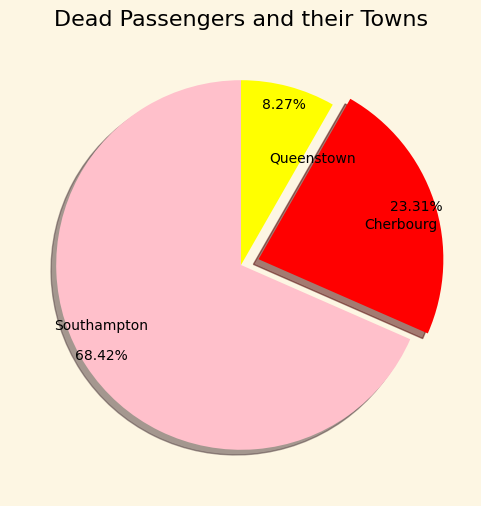

In [46]:
plt.figure(figsize=(6,6))
plt.title('Dead Passengers and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(dead['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['pink','red','yellow'],explode=explode,shadow=True,startangle=90,labeldistance=0.6, pctdistance=0.9)
plt.show()

In [47]:
survived['Embarked'].value_counts()

Embarked
S    88
C    40
Q    24
Name: count, dtype: int64

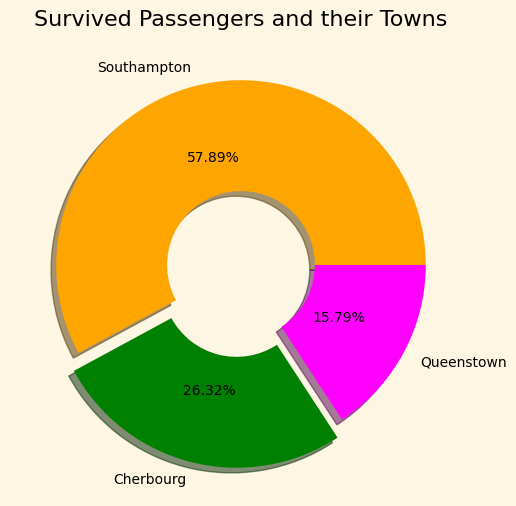

In [48]:
plt.figure(figsize=(6,6))
plt.title('Survived Passengers and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(survived['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['orange','green','magenta'],wedgeprops={'width':0.6}, explode=explode, shadow=True)
plt.show()

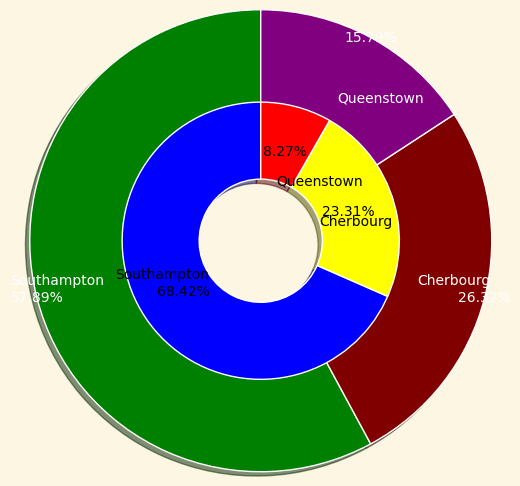

In [49]:
# Nested pie for survived and dead
#dead['Embarked'].value_counts()
#survived['Embarked'].value_counts()

plt.figure(figsize=(5,5))

#plt.subplots(figsize=(10,6), facecolor='purple')


plt.pie(dead['Embarked'].value_counts(), 
       radius=1, 
       colors=['blue','yellow','red'], 
       labels=['Southampton','Cherbourg','Queenstown'], 
       textprops={'color':'black'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        autopct ='%1.02f%%',
       #pctdistance=1.1,
        labeldistance=0.4,
        shadow=True)
plt.pie(survived['Embarked'].value_counts(), 
       radius=1.5, 
       colors=['green','maroon','purple'],
        textprops={'color':'white'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        labels=['Southampton','Cherbourg','Queenstown'], 
        shadow=True, labeldistance=0.7,autopct ='%1.02f%%',pctdistance=1)
#plt.tight_layout()
plt.show()

In [50]:
passengers.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGrp
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Youth
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,MiddleAged
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,SeniorCitizens
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Youth
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Youth


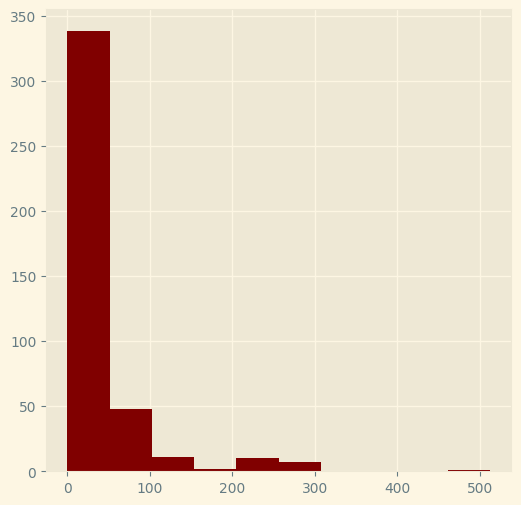

In [51]:
# Histogram for ticket fair
plt.figure(figsize=(6,6))
plt.hist(passengers['Fare'],color='maroon',)
plt.show()

In [52]:
passengers['Fare'].head(20)

0      7.8292
1      7.0000
2      9.6875
3      8.6625
4     12.2875
5      9.2250
6      7.6292
7     29.0000
8      7.2292
9     24.1500
10     7.8958
11    26.0000
12    82.2667
13    26.0000
14    61.1750
15    27.7208
16    12.3500
17     7.2250
18     7.9250
19     7.2250
Name: Fare, dtype: float64

In [53]:
profile = ProfileReport(passengers)


In [54]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
profile.to_file(output_file="rep.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]